In [ ]:
# Name - Aman Yadav
# Roll no. -202401100400029
# CSEAIML (A)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [14]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield_data.csv to crop_yield_data (2).csv


In [11]:
df = pd.read_csv(next(iter(uploaded)))

In [12]:
df['Seed_Type'] = LabelEncoder().fit_transform(df['Seed_Type'])

In [6]:
X = df[['Soil_Quality', 'Rainfall', 'Seed_Type']]
y = df['Yield_Category']


In [7]:
y_encoded = LabelEncoder().fit_transform(y)


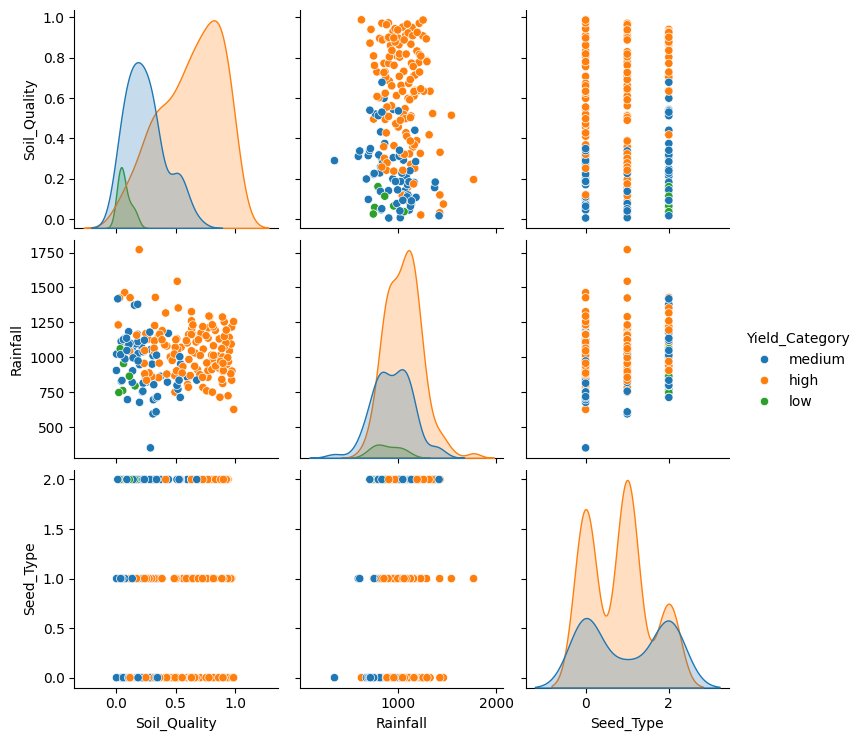

ValueError: could not convert string to float: 'medium'

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='Yield_Category')
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           2       0.71      0.83      0.77        12

    accuracy                           0.85        40
   macro avg       0.82      0.85      0.83        40
weighted avg       0.86      0.85      0.85        40

